# EDA

## Análisis exploratorio

En esta sección se organizara y preparará los datos, para identificar fallos en la recogida, diseño evaluar, datos ausentes, identificar casos atípicos.

Algunas preguntas para iniciar:

¿Hay sesgos en los datos?

¿Existen errores en la codificación de los datos?

¿Cómo se presentan los datos y cuál es la mejor forma de visualizarlos?

¿Exisisten datos atípicos(outliers)?¿Cuáles son? ¿Cómo tratarlos?

¿Hay datos faltantes(missing) y cómo se deberían tratar?

In [1]:
import pandas as pd
data_arg=pd.read_csv('../data/---datos limpios/df_propiedades.csv')

RECORDAMOS: El objetivo es crear un modelo de machine learning que prediga precios de propiedades en Argentina, solo el tipo de operación venta y en dolares. 

In [2]:
data_arg.sample(5)

,localidad,id,ad_type,start_date,end_date,created_on,lat,lon,país,provincia,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
123880,San Miguel,8o5ijgooLrexxOzvRfhSvA==,Propiedad,2020-09-10,2020-12-28,2020-09-10,-34.552707,-58.685979,Argentina,Bs.As. G.B.A. Zona Norte,...,2.0,240.0,171.0,160000.0,USD,NaN,"Casa en Venta, Bella vista U$S 160000","Venta de Casa 2 AMBIENTES, Bella Vista\n\nCasa...",Casa,Venta
165600,San Martín de los Andes,ANNv+DUglLD3M4lYf6dUNA==,Propiedad,2020-05-02,2020-05-14,2020-05-02,-40.137572,-71.299965,Argentina,Neuquén,...,1.0,36.0,36.0,95000.0,USD,NaN,Belgrano 100 1° - U$D 95.000 - Departamento ...,Departamento 36m² 1 ambiente en Belgrano 100 1...,Departamento,Venta
430626,Palermo,3WKqcQPiVz6wZefOUT/SrQ==,Propiedad,2020-08-04,2020-08-13,2020-08-04,-34.575928,-58.433720,Argentina,Capital Federal,...,2.0,73.0,70.0,165000.0,USD,NaN,Departamento en venta de 3 ambientes y medios ...,Edificio con vigilancia 24 hs. Son 2 torres de...,Departamento,Venta
283917,Puerto Madero,s6b0crelUWhs9YghCYhkjA==,Propiedad,2021-01-26,2021-06-05,2021-01-26,-34.617865,-58.360868,Argentina,Capital Federal,...,1.0,60.0,61.0,370000.0,USD,Mensual,Departamento - Puerto Madero,Excelente 2 amb con vista a la ciudad! VISTA A...,Departamento,Venta
566583,Lomas de Zamora,rhig/eGg9cHbOPPNBBnpyg==,Propiedad,2020-05-26,9999-12-31,2020-05-26,-34.744378,-58.393765,Argentina,Bs.As. G.B.A. Zona Sur,...,0.0,13.0,13.0,20000.0,USD,NaN,"Cochera en Venta en Banfield este, banfield ...",Cocheras en subsuelo cubiertas\n\n XINTEL(LVN-...,Cochera,Venta


In [3]:
data_arg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609185 entries, 0 to 609184
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   localidad        609185 non-null  object 
 1   id               609185 non-null  object 
 2   ad_type          609185 non-null  object 
 3   start_date       609185 non-null  object 
 4   end_date         609185 non-null  object 
 5   created_on       609185 non-null  object 
 6   lat              609185 non-null  float64
 7   lon              609185 non-null  float64
 8   país             609185 non-null  object 
 9   provincia        609185 non-null  object 
 10  rooms            609185 non-null  float64
 11  bedrooms         609185 non-null  float64
 12  bathrooms        609185 non-null  float64
 13  surface_total    609185 non-null  float64
 14  surface_covered  609185 non-null  float64
 15  price            609185 non-null  float64
 16  currency         609185 non-null  obje

¿Qué variables tenemos?

In [4]:
print(data_arg.columns)

Index(['localidad', 'id', 'ad_type', 'start_date', 'end_date', 'created_on',
       'lat', 'lon', 'país', 'provincia', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')


¿Estas variables influyen o impactan en el precio de las propiedades(variable dependiente)?

Los posibles features:


* localidad
* provincia
* lat y lon
* rooms
* bedrooms
* bathrooms
* surface_total
* surface_covered
* property_type                  

Descartadas:
* currency: es el tipo de moneda, que ya lo filtre anteriormente solo propiedades en USD(dolares)
* operation_type: porque solo me interesan las propiedad de venta y anteriormente se filtro por el tipo de operación venta.

¿Los datos estan en el tipo de dato correcto?

In [5]:
data_arg.dtypes

localidad           object
id                  object
ad_type             object
start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
país                object
provincia           object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
price_period        object
title               object
description         object
property_type       object
operation_type      object
dtype: object

¿Esos posibles features tienen datos nulos?

In [6]:
data_arg.isnull().sum()

localidad               0
id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                     0
lon                     0
país                    0
provincia               0
rooms                   0
bedrooms                0
bathrooms               0
surface_total           0
surface_covered         0
price                   0
currency                0
price_period       387123
title                   1
description            24
property_type           0
operation_type          0
dtype: int64

Insight las posibles features:

* No contienen datos nulos
* La mayoria de datos estan en float, excepto: provincia, localidad, tipo de propiedad, que estan en object

In [7]:
data_arg[["lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]].describe(percentiles=[i/10 for i in list(range(1, 10))+[0.01 ,0.99]]). round(1). T


,count,mean,std,min,0.1%,9.9%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
lat,609185.0,-34.6,1.8,-54.8,-42.8,-37.1,-37.1,-34.8,-34.7,-34.6,-34.6,-34.6,-34.5,-34.4,-32.9,-22.0
lon,609185.0,-59.2,2.3,-72.9,-71.6,-60.9,-60.9,-58.9,-58.7,-58.6,-58.5,-58.4,-58.4,-58.4,-58.0,-53.7
rooms,609185.0,2.5,1.8,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,4.0,5.0,40.0
bedrooms,609185.0,1.7,1.9,-16.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,900.0
bathrooms,609185.0,1.4,1.1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,20.0
surface_total,609185.0,267.6,1325.1,10.0,12.0,48.0,48.0,60.0,60.0,70.0,100.0,200.0,240.0,297.0,649.0,100000.0
surface_covered,609185.0,1201.1,768980.2,1.0,2.0,42.0,42.0,54.0,54.0,62.0,84.0,150.0,171.0,230.0,412.0,600000000.0


Insight:

* Lat y lon tienen valores razonables para propiedades en Argentina.

* rooms: el maximo 40 --> parece outlier

* bedrooms: el min es -16 es un error, el max 900 tambien parece un error

* bathrooms: maximo 20 puede ser posible, pero poco común. Revisar si es outlier

* superficie total: 

 la mediana es 267 m2

el max 100.000 m2 probablemente sea un error

* superficie cubierta: 

la media: 1201 es raro, porque es más grande que la mediana de superficie total

el maximo: 600.000.000. Es un error 

In [8]:
#eliminar los valore negativos de bedrooms
data_arg = data_arg[data_arg['bedrooms']>= 0]

Resultado:
Definimos la variable target y separamos las variables categoricas de las numericas.

In [9]:
# Definir variable target
target = ["price"]

# Separar variables categóricas (tipo object, excluyendo el target)
categoricas = data_arg.drop(columns=target).select_dtypes(include="object").columns.tolist()

# Separar variables numéricas (tipo number)
numericas = data_arg.select_dtypes(include="number").columns.tolist()

## ¿Cómo estan distribuidas las variables?

## Análisis univariado

### Análisis target: price

¿Cómo esta distribuido el precio de las propiedades?

In [10]:
data_arg.price.describe().round(1)

count       609183.0
mean        223921.7
std         468028.4
min              0.0
25%          75000.0
50%         130000.0
75%         240000.0
max      111111111.0
Name: price, dtype: float64

Insight:

El precio promedio es 223.921, pero hay precios de propiedades que cuestan 0 y otras muchisimo más 111 millones, que son outiliers. Por lo que la desviación estándar es muy alta: 468.028

Se realiza un histograma y log-histograma para ver la distribución de precio. 

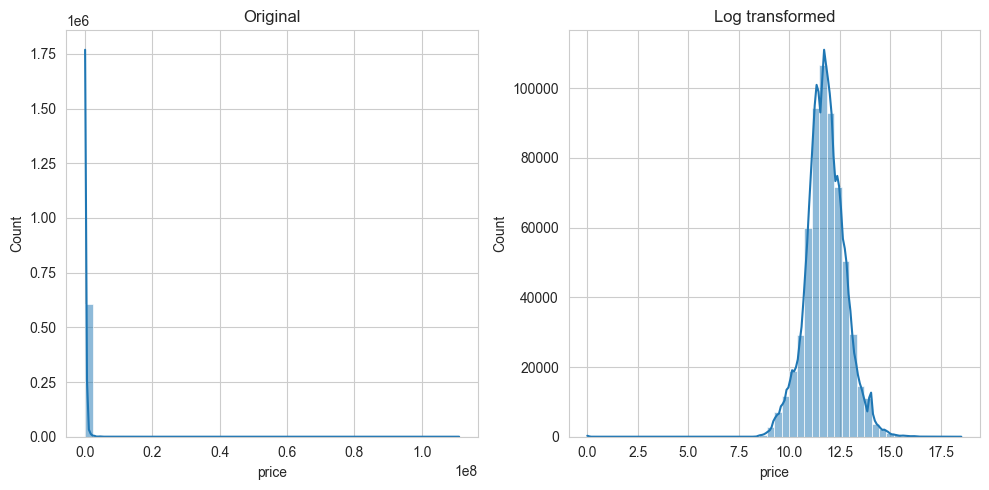

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))

# Histograma original
plt.subplot(1, 2, 1)
sns.histplot(data_arg['price'], bins=50, kde=True)
plt.title('Original')

# Histograma con log1p
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(data_arg['price']), bins=50, kde=True)
plt.title('Log transformed')

plt.tight_layout()

Insight distribución original:

* Hay un **sesgo positivo** porque hay una alta concentración de precios bajos, y valores extremadamente altos (outliers) que estiran la escala hacia la derecha.



¿Cómo tratar los outliers?

In [12]:
data_arg['price'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1)


count       609183.0
mean        223921.7
std         468028.4
min              0.0
1%           12500.0
10%          43000.0
20%          65000.0
30%          84500.0
40%         105000.0
50%         130000.0
60%         160000.0
70%         210000.0
80%         280000.0
90%         440000.0
99%        1500000.0
max      111111111.0
Name: price, dtype: float64

In [13]:
print(f"Cantidad de outliers por encima del P99: {(data_arg['price'] > data_arg['price'].quantile(0.99)).sum()}")


Cantidad de outliers por encima del P99: 5913


Insight: 
Hay un cambio abrupto de 1.500.000 a 111.0000.000 que explica la distribución altamente sesgada. Por ultimo, son 5913 propiedades por encima P99.

Para que esto no afecte los modelos, correlaciones y visualizaciones se decide, realizar la transformación logaritmica a price. 

In [14]:
data_arg[data_arg['price'] == 0].shape

(129, 22)

In [15]:
#se elimina las propiedades ==0 
data_arg = data_arg[data_arg['price'] > 0]


In [16]:
data_arg['price_log'] = np.log(data_arg['price'])


### Variables discretas: rooms,bedrooms, bathrooms

In [17]:
data_arg[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']].describe().round(1)


,rooms,bedrooms,bathrooms,surface_total,surface_covered
count,609054.0,609054.0,609054.0,609054.0,609054.0
mean,2.5,1.7,1.4,267.5,1201.3
std,1.8,1.9,1.1,1325.2,769062.9
min,0.0,0.0,0.0,10.0,1.0
25%,1.0,1.0,1.0,60.0,54.0
50%,2.0,1.0,1.0,100.0,84.0
75%,4.0,3.0,2.0,240.0,171.0
max,40.0,900.0,20.0,100000.0,600000000.0


Valores extremos:

*Rooms*
* Max -->40. Probablemente sea un outlier

*Bedrooms*
* Max -->900. Es un valor outlier

*Bathrooms*
* Max -->20. Es un valor inusual

*Surface_total*
* std: 1325.2 es muy alta con respecto al promedio que es 267.5. Lo que indica que hay propiedades extremadamente grandes en comparación con la media.

* Max:  100,000 m², lo que es una superficie extremadamente grande, y podría reflejar propiedades comerciales o grandes terrenos.

*Surface_covered*

* std: 769062.9 refleja una gran variabilidad con respecto a la media.

* Max: 600.000.000 es un valor extremadamente alto y probablemente sea un error en la carga de datos o propiedades expecionales(terrenos muy grandes)

In [18]:
data_arg.dtypes


localidad           object
id                  object
ad_type             object
start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
país                object
provincia           object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
price_period        object
title               object
description         object
property_type       object
operation_type      object
price_log          float64
dtype: object

In [19]:
data_arg["bathrooms"] = data_arg["bathrooms"].astype("Int64")
data_arg["rooms"] = data_arg["rooms"].astype("Int64")
data_arg["bedrooms"] = data_arg["bedrooms"].astype("Int64")


#### Rooms

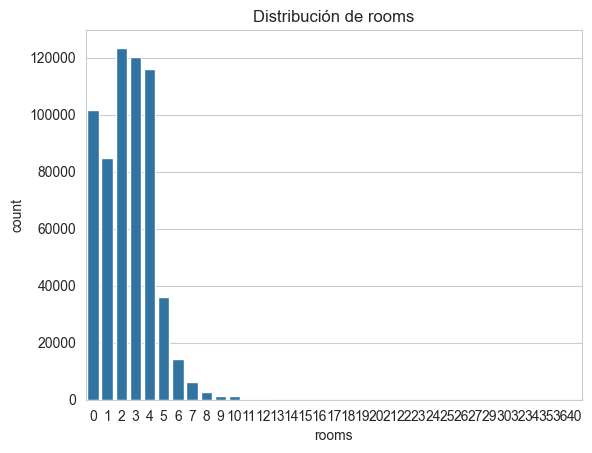

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot para valores enteros
sns.countplot(x=data_arg["rooms"])
plt.title("Distribución de rooms")
plt.show()

Insight:

Distribución sesgada a la izquierda(positiva), porque la mayoria de propiedades tiene entre 1 y 5 habitaciones. A partir de 6, la frecuencia cae.

Outliers a la derecha: como vimos en el discribe() y acá se confirma hay propiedades con hasta 40 habitaciones.

El número de propiedades con más de 6 habitaciones es muy bajo.

¿Cómo tratar los outliers?

In [21]:
data_arg['rooms'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1)


count    609054.0
mean          2.5
std           1.8
min           0.0
1%            0.0
10%           0.0
20%           1.0
30%           1.0
40%           2.0
50%           2.0
60%           3.0
70%           3.0
80%           4.0
90%           5.0
99%           7.0
max          40.0
Name: rooms, dtype: Float64

In [22]:
print(f"Cantidad de outliers por encima del P99: {(data_arg['rooms'] > data_arg['rooms'].quantile(0.99)).sum()}")


Cantidad de outliers por encima del P99: 6079


Insight:
* El 99% de las propiedades tienen ≤ 7 rooms y hay un cambio abrupto hacia 40 rooms.

* Hay 6.079 outliers por encima del percentil 99 (P99), lo que representa solo el 1% del total.

Con estos datos, se decide el metodo capping con P99, para tratar los outliers de rooms.

In [23]:
p99 = data_arg['rooms'].quantile(0.99)  # P99 = 7.0
data_arg['rooms_capped'] = data_arg['rooms'].apply(lambda x: p99 if x > p99 else x)


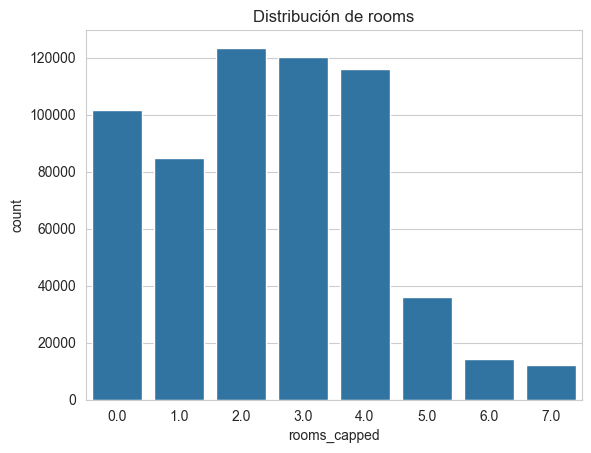

In [24]:
# Countplot para valores enteros
sns.countplot(x=data_arg["rooms_capped"])
plt.title("Distribución de rooms")
plt.show()

#### Bedrooms

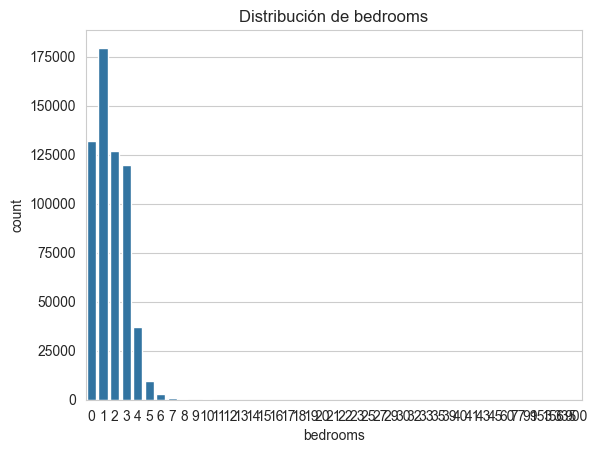

In [25]:
sns.countplot(x=data_arg["bedrooms"])
plt.title("Distribución de bedrooms")
plt.show()

Tratamiento outliers

In [26]:
print(data_arg['bedrooms'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1))

print(f"Cantidad de outliers por encima del P99: {(data_arg['bedrooms'] > data_arg['bedrooms'].quantile(0.99)).sum()}")


count    609054.0
mean          1.7
std           1.9
min           0.0
1%            0.0
10%           0.0
20%           0.0
30%           1.0
40%           1.0
50%           1.0
60%           2.0
70%           2.0
80%           3.0
90%           3.0
99%           5.0
max         900.0
Name: bedrooms, dtype: Float64
Cantidad de outliers por encima del P99: 4680


In [27]:
p99 = data_arg['bedrooms'].quantile(0.99)  # 5.0
data_arg['bedrooms_capped'] = data_arg['bedrooms'].apply(lambda x: p99 if x > p99 else x)


#### Bathrooms

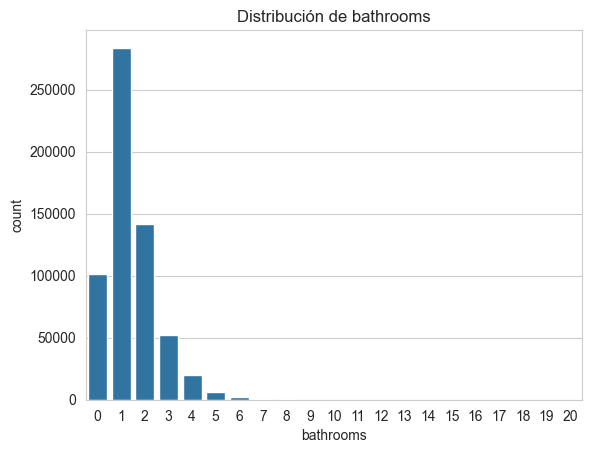

In [28]:
sns.countplot(x=data_arg["bathrooms"])
plt.title("Distribución de bathrooms")
plt.show()

Insight:

Distribución con sesgo positivo. Porque la mayoria de las propiedades tienen entre 1 y 2 baños. Pero encontramos en una 20 baños, lo cual es un outlier.

In [29]:
print(data_arg['bathrooms'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1))
print(f"Cantidad de outliers por encima del P99: {(data_arg['bathrooms'] > data_arg['bathrooms'].quantile(0.99)).sum()}")


count    609054.0
mean          1.4
std           1.1
min           0.0
1%            0.0
10%           0.0
20%           1.0
30%           1.0
40%           1.0
50%           1.0
60%           1.0
70%           2.0
80%           2.0
90%           3.0
99%           5.0
max          20.0
Name: bathrooms, dtype: Float64
Cantidad de outliers por encima del P99: 3322


In [30]:
p99 = data_arg['bathrooms'].quantile(0.99)  # 5.0
data_arg['bathrooms_capped'] = data_arg['bathrooms'].apply(lambda x: p99 if x > p99 else x)


### Variables continuas

#### Surface_covered

In [32]:
data_arg.surface_covered.describe().round(1)

count       609054.0
mean          1201.3
std         769062.9
min              1.0
25%             54.0
50%             84.0
75%            171.0
max      600000000.0
Name: surface_covered, dtype: float64

Insight: Surface_covered tiene una distribución muy sesgada por que el valor max 600.000.000 que puede ser un outlier o error de carga.


In [33]:
print(data_arg['surface_covered'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1))

print(f"Cantidad de outliers por encima del P99: {(data_arg['surface_covered'] > data_arg['surface_covered'].quantile(0.99)).sum()}")


count       609054.0
mean          1201.3
std         769062.9
min              1.0
1%              13.0
10%             42.0
20%             54.0
30%             54.0
40%             62.0
50%             84.0
60%            150.0
70%            171.0
80%            230.0
90%            412.0
99%            530.0
max      600000000.0
Name: surface_covered, dtype: float64
Cantidad de outliers por encima del P99: 6080


Insight:
* El percentil 99% indica que el 99% de las propiedades tienen una superficie cubierta menor o igual a 530 m².

* Tambien significa que solo el 1% de los datos está por encima de 530 m², que son 6080 propiedades. 

Por lo tanto, para graficar vamos ajustar esos datos, optando por vidualizar solo hasta el percentil 99 para entender la distribución general.

In [34]:
# Mostrar P95, P98, P99, P99.5 y P99.9 de surface_covered redondeado
print(data_arg['surface_covered'].describe(percentiles=[0.95, 0.98, 0.99, 0.995, 0.999]).round(1))


count       609054.0
mean          1201.3
std         769062.9
min              1.0
50%             84.0
95%            412.0
98%            412.0
99%            530.0
99.5%          848.0
99.9%         3000.0
max      600000000.0
Name: surface_covered, dtype: float64


¿Cómo tratar los outliers? 

In [35]:
# Definí los percentiles que queremos calcular
percentiles = [0.98, 0.99, 0.995, 0.999]

# Creamos una función que calcula los percentiles deseados
def calculate_percentiles(group):
    result = {}
    for p in percentiles:
        result[f'P{int(p*1000)/10}'] = np.percentile(group['surface_covered'], p*100)
    return pd.Series(result)

# Aplicamos la función por tipo de propiedad
percentile_summary = (
    data_arg.groupby('property_type')
      .apply(calculate_percentiles)
      .reset_index()
      .sort_values(by='P99.9', ascending=False)
)

percentile_summary

C:\Users\NB USER\AppData\Local\Temp\ipykernel_1096\3227131367.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calculate_percentiles)


,property_type,P98.0,P99.0,P99.5,P99.9
4,Depósito,4700.00,9032.4,38418.970,86664.000
6,Lote,775.00,1200.0,2300.000,17000.000
1,Casa de campo,561.00,1292.0,2221.200,10170.880
5,Local comercial,1000.00,1350.0,1800.000,4510.902
7,Oficina,695.64,1030.0,1330.000,2501.014
0,Casa,439.00,516.0,632.790,1000.000
3,Departamento,177.00,230.0,293.000,406.000
8,PH,185.00,228.0,270.000,400.000
2,Cochera,18.00,25.0,37.075,209.920


Insight: 

Depósitos, lotes y casas de campo muestran valores extremos muy alejados del percentil 99.5 → hay outliers claros, se recomienda truncar en P99.5.

Oficinas también presentan una diferencia considerable; el valor en P99.9 es dudoso → usar P99.5 como umbral de corte.

Cocheras tienen un valor extremo totalmente fuera de escala (210 m²) → usar P99.5 = 37 m².

Locales comerciales, casas, departamentos y PH tienen valores razonables en P99.9 → se pueden mantener sin recorte o usar P99.9 como umbral.


Tratamiento outliers

Eleji usar el capping por tipo de propiedad(property_type), ya que efectiviamente la superficie cubeirta varia entre departamento, casa de campo, deposito, etc. 

In [36]:
# Crear copia para trabajar sin modificar la original
data_arg['surface_covered_capped'] = data_arg['surface_covered']

# Agrupar por tipo de propiedad y aplicar capping personalizado
for prop_type, group in data_arg.groupby('property_type'):
    lower = group['surface_covered'].quantile(0.01)
    upper = group['surface_covered'].quantile(0.99)
    
    # Aplicar clip solo a los índices correspondientes a este grupo
    idx = group.index
    data_arg.loc[idx, 'surface_covered_capped'] = data_arg.loc[idx, 'surface_covered'].clip(lower=lower, upper=upper)


Validación

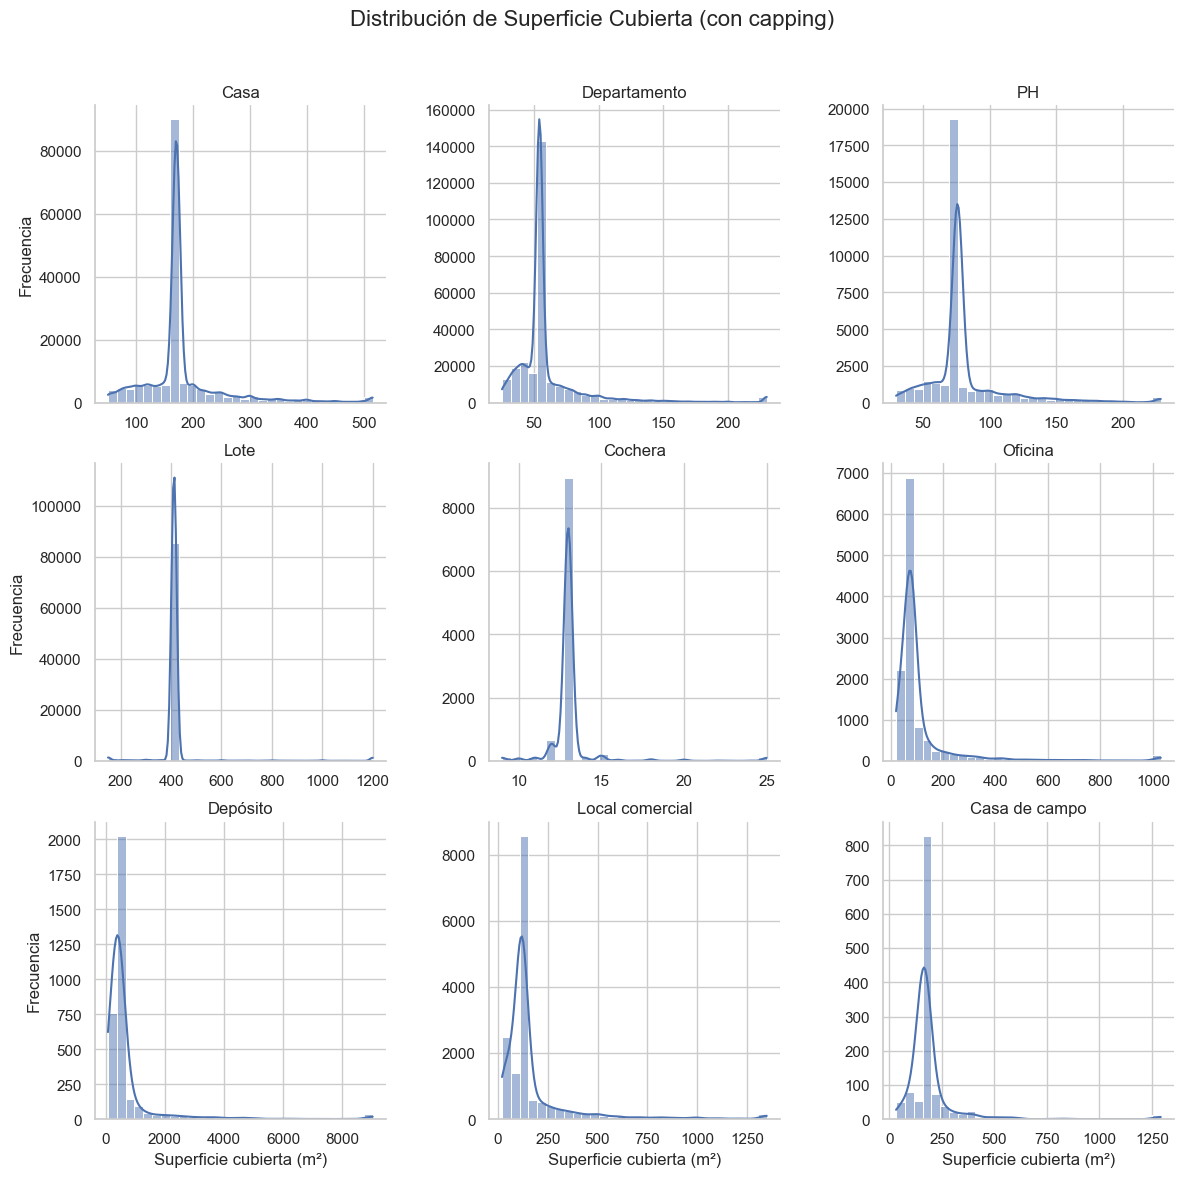

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo general
sns.set(style="whitegrid")

# Crear el FacetGrid por tipo de propiedad
g = sns.FacetGrid(data_arg, col="property_type", col_wrap=3, height=4, sharex=False, sharey=False)

# Graficar histogramas con KDE
g.map(sns.histplot, "surface_covered_capped", bins=30, kde=True, color="#4c72b0")

# Etiquetas y formato
g.set_titles("{col_name}")
g.set_axis_labels("Superficie cubierta (m²)", "Frecuencia")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribución de Superficie Cubierta (con capping)", fontsize=16)

# Mostrar
plt.show()

Insight:Sesgo positivo, incluso después de aplicar capping. 
Lo cual es esperable y aceptable en el contexto inmobiliario. Por qué:

* La superficie cubierta en propiedades reales no se distribuye normalmente. Siempre habrá más propiedades con superficie chica (como departamentos) y menos propiedades grandes (como depósitos o casas de campo), pero esas grandes siguen existiendo y son relevantes.

¿Es probable que exactamente tantas propiedades tengan esas superficies justas? ¿Debe ser tratado como outliers?

#### Surface_total

In [35]:
data_arg['surface_total'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1)


count    609054.0
mean        267.5
std        1325.2
min          10.0
1%           13.0
10%          48.0
20%          60.0
30%          60.0
40%          70.0
50%         100.0
60%         200.0
70%         240.0
80%         297.0
90%         649.0
99%        1200.0
max      100000.0
Name: surface_total, dtype: float64

In [36]:
print(f"Cantidad de outliers por encima del P99: {(data_arg['surface_total'] > data_arg['surface_total'].quantile(0.99)).sum()}")


Cantidad de outliers por encima del P99: 6044


In [44]:
# Definí los percentiles que queremos calcular
percentiles = [0.98, 0.99, 0.995, 0.999]

# Creamos una función que calcula los percentiles deseados
def calculate_percentiles(group):
    result = {}
    for p in percentiles:
        result[f'P{int(p*1000)/10}'] = np.percentile(group['surface_total'], p*100)
    return pd.Series(result)

# Aplicamos la función por tipo de propiedad
percentile_summary = (
    data_arg.groupby('property_type')
      .apply(calculate_percentiles)
      .reset_index()
      .sort_values(by='P99.9', ascending=False)
)

percentile_summary

C:\Users\NB USER\AppData\Local\Temp\ipykernel_1096\863498680.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calculate_percentiles)


,property_type,P98.0,P99.0,P99.5,P99.9
6,Lote,2599.20,6377.60,16405.05,59395.000
1,Casa de campo,10000.00,14400.00,17300.00,19780.000
4,Depósito,3985.96,5587.00,8614.80,10000.000
7,Oficina,728.00,1105.70,1368.34,2600.000
5,Local comercial,979.84,1212.00,1500.00,1900.000
0,Casa,920.00,1075.58,1200.00,1484.032
8,PH,256.00,305.32,361.66,503.000
3,Departamento,201.00,257.00,319.00,430.000
2,Cochera,21.00,26.00,38.00,73.830


Insight:
* El percentil 99% indica que el 99% de las propiedades tienen una superficie cubierta menor o igual a 1200m2.

* Tambien significa que solo el 1% de los datos está por encima de 1200m2, que son 6044 propiedades.

In [43]:
# Definimos los percentiles que queremos calcular
percentiles = [0.98, 0.99]

# Creamos una función que calcula los percentiles deseados para dos columnas
def calculate_percentiles(group):
    result = {}
    for p in percentiles:
        result[f'surface_covered_P{int(p*100)}'] = np.percentile(group['surface_covered'].dropna(), p*100)
        result[f'surface_total_P{int(p*100)}'] = np.percentile(group['surface_total'].dropna(), p*100)
    return pd.Series(result)

# Aplicamos la función por tipo de propiedad y ordenamos de menor a mayor por uno de los percentiles
percentile_summary = (
    data_arg.groupby('property_type')
      .apply(calculate_percentiles)
      .reset_index()
      .sort_values(by='surface_covered_P99', ascending=True)  # ordena por el percentil 99 de surface_covered
)

percentile_summary


C:\Users\NB USER\AppData\Local\Temp\ipykernel_1096\1073806581.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calculate_percentiles)


,property_type,surface_covered_P98,surface_total_P98,surface_covered_P99,surface_total_P99
2,Cochera,18.00,21.00,25.0,26.00
8,PH,185.00,256.00,228.0,305.32
3,Departamento,177.00,201.00,230.0,257.00
0,Casa,439.00,920.00,516.0,1075.58
7,Oficina,695.64,728.00,1030.0,1105.70
6,Lote,775.00,2599.20,1200.0,6377.60
1,Casa de campo,561.00,10000.00,1292.0,14400.00
5,Local comercial,1000.00,979.84,1350.0,1212.00
4,Depósito,4700.00,3985.96,9032.4,5587.00


Insight:

Hay superficies totales que son menores que la superficie cubierta en local comercial y deposito. Cuando la superficie total debe ser mayor que la cubierta. 
Ejemplo:

Un depósito tiene 9,032 m² cubiertos pero solo 5,587 m² de superficie total. Eso no tiene sentido físico.

Probablemente alguien completo mal los datos o omitio patios, terrazas, u otros espacios no cubiertos. 

In [46]:
# Crear copia para trabajar sin modificar la original
data_arg['surface_total_capped'] = data_arg['surface_total']

# Definir tipos para capping personalizado (excluidos aquí)
tipos_excluidos = ['Local comercial', 'Depósito']

# Aplicar capping general (percentil 1% y 99%) a los demás tipos
for prop_type, group in data_arg.groupby('property_type'):
    if prop_type not in tipos_excluidos:
        lower = group['surface_total'].quantile(0.01)
        upper = group['surface_total'].quantile(0.99)
        
        idx = group.index
        data_arg.loc[idx, 'surface_total_capped'] = data_arg.loc[idx, 'surface_total'].clip(lower=lower, upper=upper)


In [47]:
# Capping personalizado para Local Comercial y Depósito
for prop_type, group in data_arg.groupby('property_type'):
    if prop_type == 'Local comercial':
        lower = group['surface_total'].quantile(0.01)
        upper = group['surface_total'].quantile(0.995)  # 99.5%
    elif prop_type == 'Depósito':
        lower = group['surface_total'].quantile(0.01)
        upper = group['surface_total'].quantile(0.999)  # 99.9%
    else:
        continue  # saltar otros tipos
    
    idx = group.index
    data_arg.loc[idx, 'surface_total_capped'] = data_arg.loc[idx, 'surface_total'].clip(lower=lower, upper=upper)


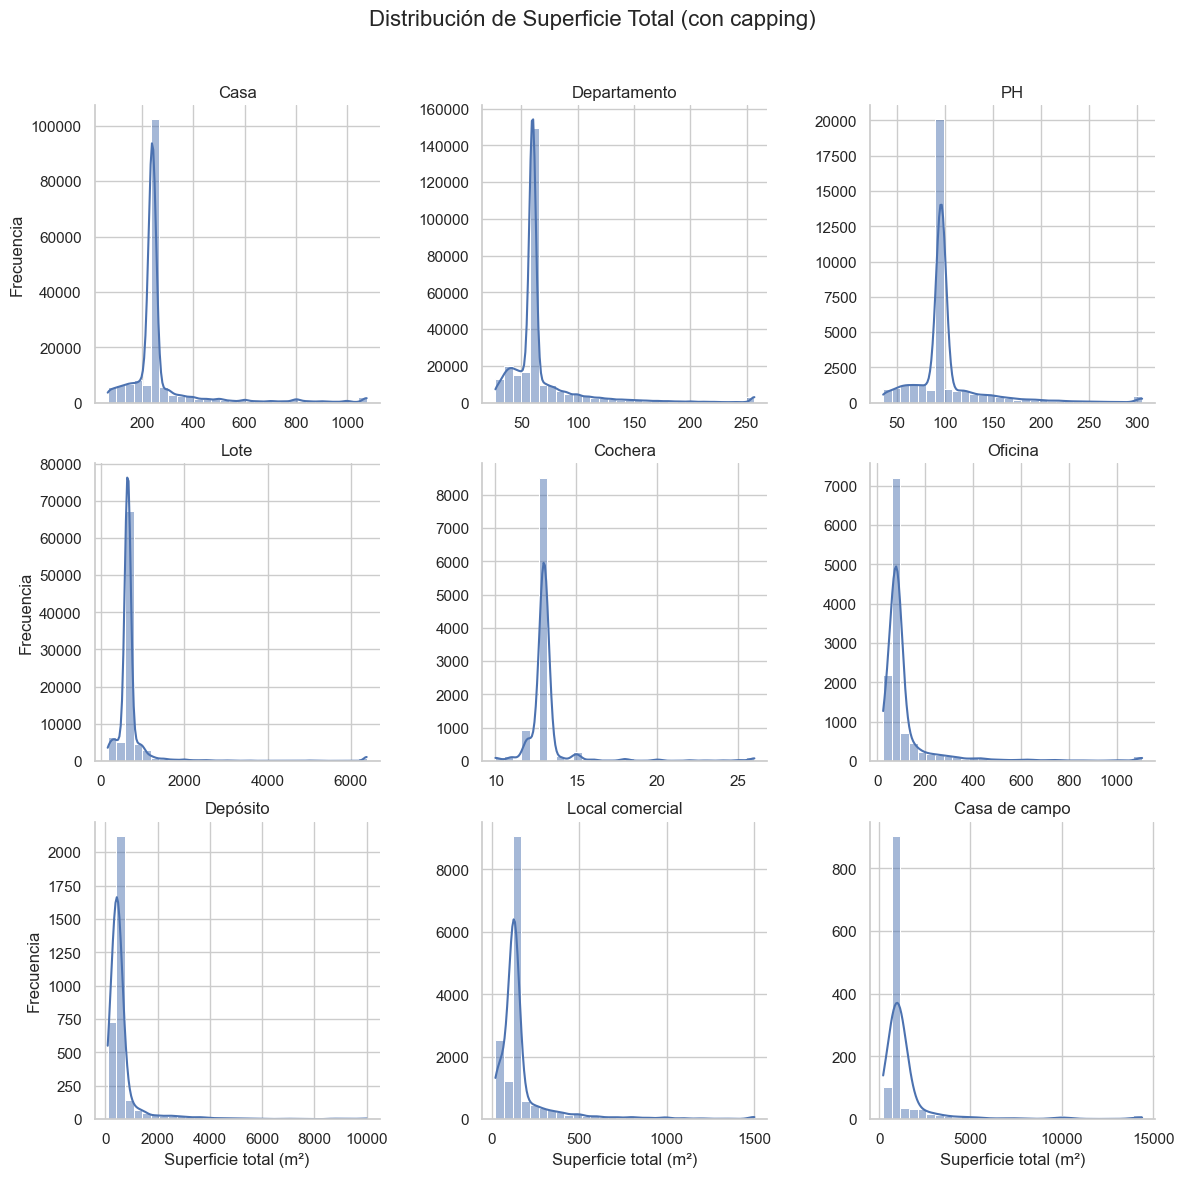

In [48]:
# Configurar estilo general
sns.set(style="whitegrid")

# Crear el FacetGrid por tipo de propiedad
g = sns.FacetGrid(data_arg, col="property_type", col_wrap=3, height=4, sharex=False, sharey=False)

# Graficar histogramas con KDE
g.map(sns.histplot, "surface_total_capped", bins=30, kde=True, color="#4c72b0")

# Etiquetas y formato
g.set_titles("{col_name}")
g.set_axis_labels("Superficie total (m²)", "Frecuencia")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribución de Superficie Total (con capping)", fontsize=16)

# Mostrar
plt.show()

## Analis bivariado: Correlaciones y dependencia

### Numericas

In [43]:
def cap_outliers(df, column, lower=0.01, upper=0.99):
    q_low = df[column].quantile(lower)
    q_high = df[column].quantile(upper)
    return df[column].clip(lower=q_low, upper=q_high)

# Aplicás a las variables relevantes:
for col in ['price', 'surface_total', 'surface_covered', 'rooms', 'bedrooms', 'bathrooms']:
    data_arg[col] = cap_outliers(data_arg, col)


In [45]:
# Variables que vas a analizar
numericas = ['price', 'surface_total', 'surface_covered', 'rooms', 'bedrooms', 'bathrooms']

<Axes: >

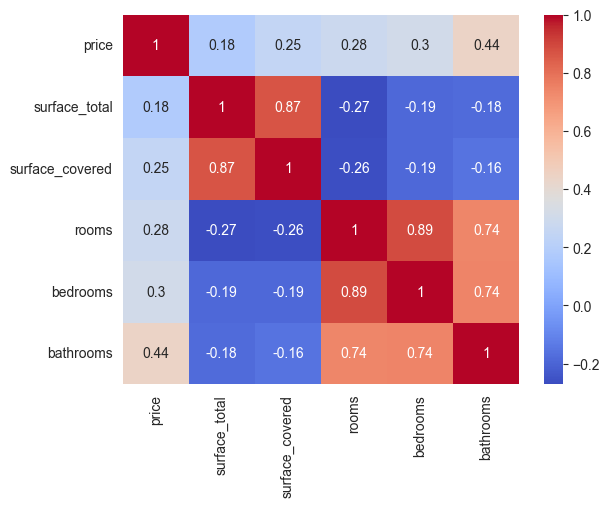

In [46]:
sns.heatmap(data_arg[numericas].corr(method='pearson'), annot=True, cmap='coolwarm')


### Categoricas

¿El precio aumenta con más habitaciones, baños, dormitorios?

¿Cómo es la relación entre price y variables de surficies?

¿Qué provincias o localidad tienen los precios más altos o bajos?

¿Cual es la relación precio y el tipo de propiedad?¿Los departamentos son más baratos que las casas?